**1.Gathering the libraries**

In [2]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd


**2. Load the data **

In [5]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
X = df.drop("target", axis=1)
y = df["target"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


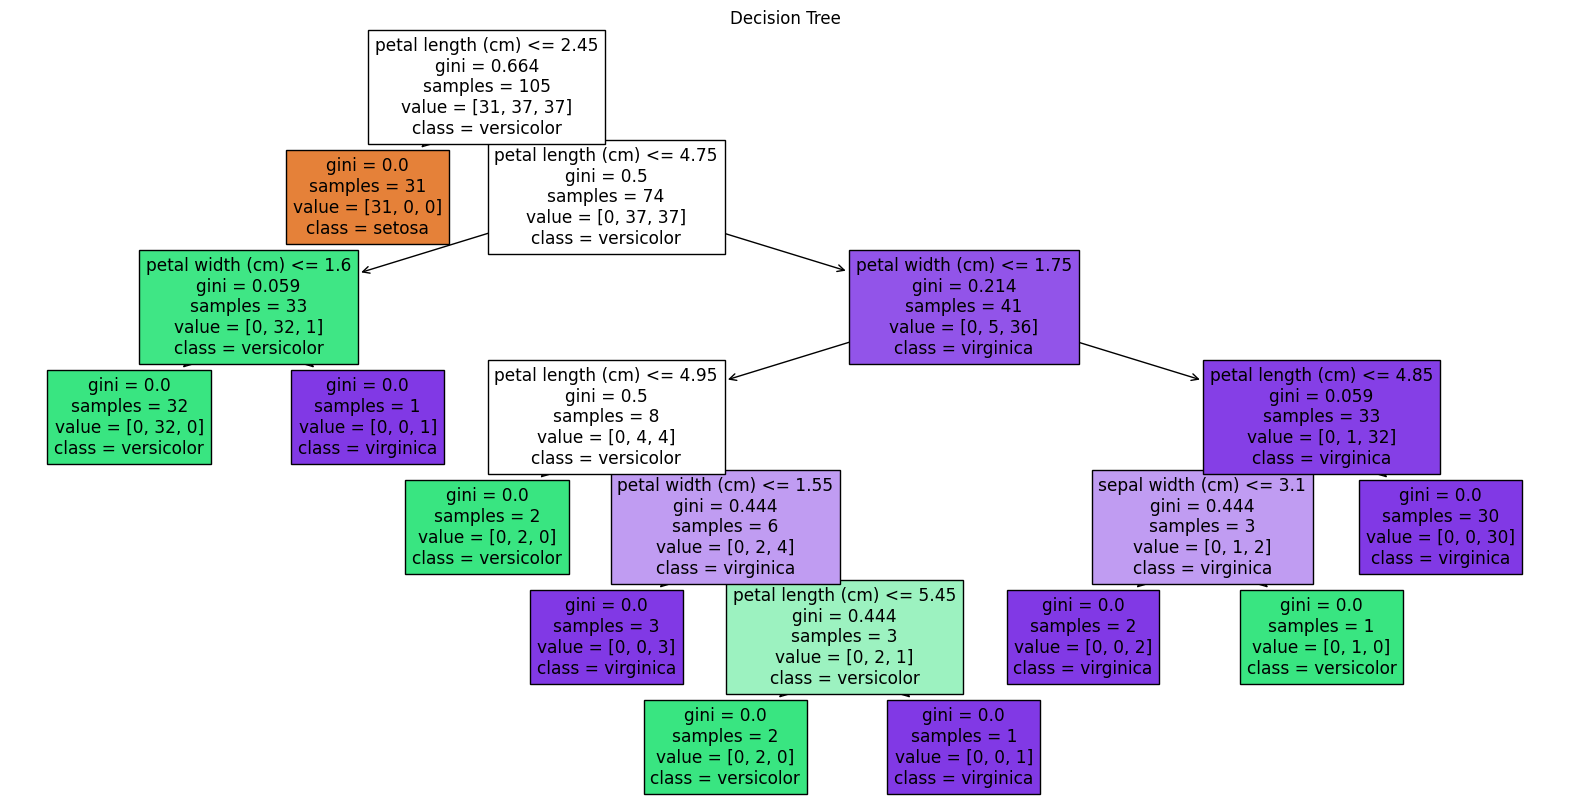

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create and train the model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=iris.target_names)
plt.title("Decision Tree")
plt.show()

In [9]:
dtree_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_limited.fit(X_train, y_train)

# Check accuracy
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, dtree_limited.predict(X_train))
test_acc = accuracy_score(y_test, dtree_limited.predict(X_test))

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")


Train Accuracy: 0.95
Test Accuracy: 1.00


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train a forest of 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Accuracy
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Random Forest Test Accuracy: {rf_acc:.2f}")


Random Forest Test Accuracy: 1.00


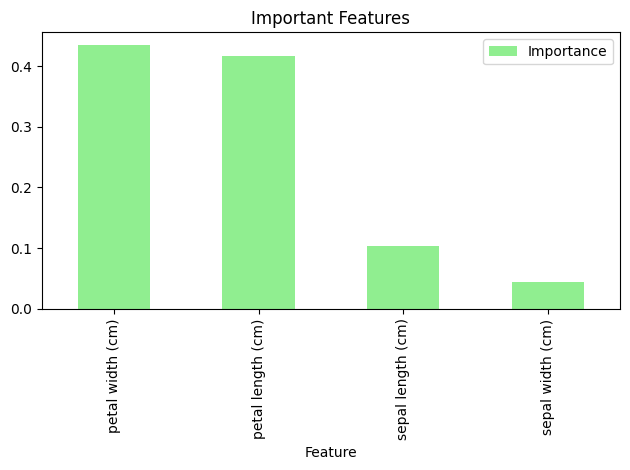

In [11]:
import pandas as pd

# Get feature importances
importances = rf.feature_importances_
feat_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False)

# Plot
feat_df.plot(kind='bar', x='Feature', y='Importance', color='lightgreen', title="Important Features")
plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import cross_val_score

dtree_scores = cross_val_score(dtree, X, y, cv=5)
rf_scores = cross_val_score(rf, X, y, cv=5)

print(f"Decision Tree CV Accuracy: {dtree_scores.mean():.2f}")
print(f"Random Forest CV Accuracy: {rf_scores.mean():.2f}")


Decision Tree CV Accuracy: 0.95
Random Forest CV Accuracy: 0.97
